<a href="https://colab.research.google.com/github/srimouli04/DSE/blob/master/Bank_note_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement: 

---



We'll use the Bank Authentication Data Set from the UCI repository.Where class indicates whether or not a Bank Note was authentic.

Data set available at : https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt


**Tasks involved:**

1. **Importing the data :**
Import the data from Bank Authentication Data Set (Links to an external site.) after converting text file into CSV and also name the column as per the sequence of the attribute information (1 point)
2.**Data Preparation :**
Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point)
3.**Statistical Analysis :**
Print some basic statistical details like percentile, mean, standard deviation of dataset (1 point)
4.**Countplot :**
Create a Countplot of the Classes (1 point)
5.**Feature Scaling :**
Do Feature Scaling on Independent variables (2 points)
6. **Modelling :**
Split the data into train and test dataset (1 point)
Use sklearn library to train on train dataset on Decision Tree and predict on test dataset  (3 points)
7. **Evaluation :**Compute the accuracy and confusion matrix. (2 points)
8.  **Pipeline**
9.   **Visualization**




#Task-1 : Importing the data

a) Importing the data from website

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

--2020-10-15 08:17:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46400 (45K) [application/x-httpd-php]
Saving to: ‘data_banknote_authentication.txt’

data_banknote_authe 100%[===================>]  45.31K  --.-KB/s    in 0.1s    

2020-10-15 08:17:04 (319 KB/s) - ‘data_banknote_authentication.txt’ saved [46400/46400]



b) Converting .TXT file to .CSV file and naming the columns as per sequence

    Attribute information from the data source :
      1. variance of Wavelet Transformed image (continuous) -> Variance 
      2. skewness of Wavelet Transformed image (continuous) -> Skewness
      3. curtosis of Wavelet Transformed image (continuous) -> Curtosis
      4. entropy of image (continuous)                      -> Entropy
      5. class (integer)                                    -> Class

In [2]:
import csv 

with open('data_banknote_authentication.txt', 'r') as txt_file:
  stripped_data = (line.strip() for line in txt_file)
  lines = (line.split(",") for line in stripped_data if line)
  with open('Bank_note_auth_data.csv','w') as csv_file:
    try:
      csv_out = csv.writer(csv_file)
      csv_out.writerow(('Variance','Skewness','Curtosis','Entropy','Class'))
      csv_out.writerows(lines)
    except:
      print('error in writing the file')
txt_file.close()
csv_file.close()

#Task-2 : Preparing the data for analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

"Let's have a look on relationships between features of our data"

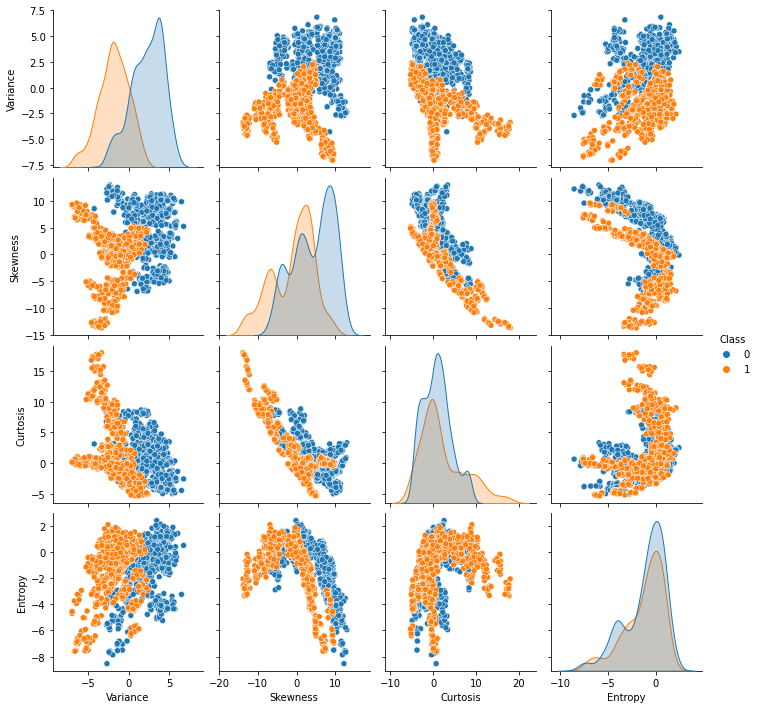

In [4]:
bnk_noteDF = pd.read_csv('Bank_note_auth_data.csv')
display("Let's have a look on relationships between features of our data")
sns.pairplot(bnk_noteDF,hue='Class')

**Analysis to remove any unneeded columns**



In [5]:
#creating a dataframe and checking  for any missing values 
bnk_noteDF.isna().value_counts() 

Variance  Skewness  Curtosis  Entropy  Class
False     False     False     False    False    1372
dtype: int64

In [6]:
bnk_noteDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
bnk_noteDF.isnull().value_counts()

Variance  Skewness  Curtosis  Entropy  Class
False     False     False     False    False    1372
dtype: int64

In [8]:
independent_vars = bnk_noteDF.iloc[:,:-1]
dependent_var = bnk_noteDF.iloc[:,-1:]

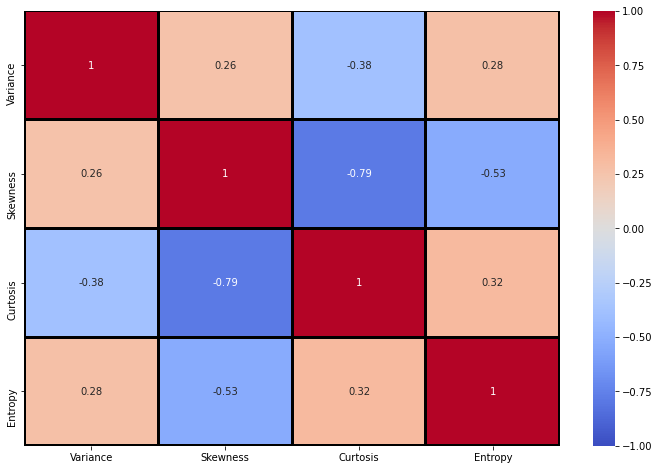

In [9]:
sns.heatmap(independent_vars.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')

From the below analysis of correlation heat map we don't find any column which appears as not needed and also we don't have any missing values in any of the columns so we've not removed any column

#Task-3 : Statistics of the data

In [10]:
bnk_noteDF.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


#Task-4 : Countplot of classes

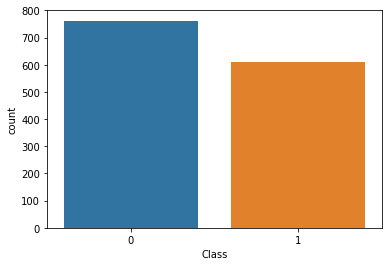

In [11]:
plt.rcParams['figure.figsize'] = (6,4)
sns.countplot(x='Class', data = bnk_noteDF)

In [12]:
bnk_noteDF['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

Looking at the above results its evident that the data isn't balanced. And as we are looking to develop a predictive model using a decision tree which is ideally more biased towards predicting the class which has higher number of instances we need to bring a balance to the classes so as to develop a unbiased model. 

So we're using the over-sampling technique to bring the balance between the classes. Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample. This is done in order to obtain approximately the same number of instances for both the classes. 

In [13]:
from sklearn.utils import resample,shuffle

In [14]:
class_0DF = bnk_noteDF[bnk_noteDF['Class'] == 0] #Majority values
class_1DF = bnk_noteDF[bnk_noteDF['Class'] == 1] #Minority values
min_df_unsampled = resample(class_1DF,replace=True,n_samples=762,random_state = 123)
bnk_noteDF_balanced = pd.concat([min_df_unsampled,class_0DF])
bnk_noteDF_balanced = shuffle(bnk_noteDF_balanced)
bnk_noteDF_balanced['Class'].value_counts()

1    762
0    762
Name: Class, dtype: int64

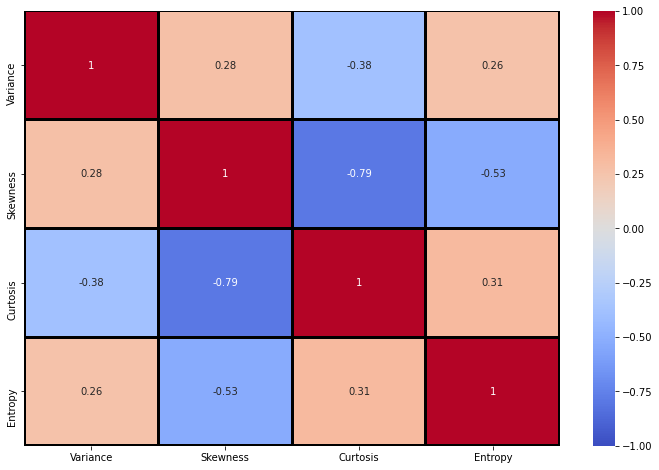

In [15]:
plt.rcParams['figure.figsize'] = (12,8)
independent_vars_balanced = bnk_noteDF_balanced.iloc[:,:-1]
dependent_var_balanced = bnk_noteDF_balanced.iloc[:,-1:]
sns.heatmap(independent_vars_balanced.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')

With balancing there hasn't been much change in the correlation values

#Task - 5 : Feature Scaling

Importing modules

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(independent_vars_balanced)

#Task - 6 : Splitting data into Test and Train data and using Decision Tree Model to predict train and test data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [19]:
#Train - Test Split
x_train,x_test,y_train,y_test = train_test_split(independent_vars_balanced,dependent_var_balanced,test_size = 0.2, random_state=42)

#Train - Validation Split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.25, random_state=42)

**Decision Tree Model**

In [20]:
tree = DecisionTreeClassifier(criterion="entropy")

In [21]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
y_val_predict =  tree.predict(x_val) #Predicting the accuracy on validation data

In [23]:
y_predict = tree.predict(x_test) #Predicting the accuracy on test data

#Task - 7 : Accuarcy score and Confusion Matrix

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [25]:
print('Accuracy score on validation data {}'.format(accuracy_score(y_val,y_val_predict)*100))  

Accuracy score on validation data 99.34426229508196


In [26]:
print(classification_report(y_val,y_val_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       129
           1       0.99      0.99      0.99       176

    accuracy                           0.99       305
   macro avg       0.99      0.99      0.99       305
weighted avg       0.99      0.99      0.99       305



In [27]:

print('Accuracy score on Test data {}'.format(accuracy_score(y_test,y_predict)*100))  

Accuracy score on Test data 98.68852459016394


In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       160
           1       0.99      0.98      0.99       145

    accuracy                           0.99       305
   macro avg       0.99      0.99      0.99       305
weighted avg       0.99      0.99      0.99       305



In [29]:
print('Confusion Matrix :\n')
print(confusion_matrix(y_test,y_predict))

Confusion Matrix :

[[159   1]
 [  3 142]]


In [30]:
score=cross_val_score(tree,independent_vars_balanced,dependent_var_balanced,cv=5)
(100*score.mean()).round(2)

98.62

#Pipeline

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
my_pipeline= Pipeline([('scaler',StandardScaler()),('tree',DecisionTreeClassifier(criterion="entropy"))])
my_pipeline.fit(x_train,y_train)
pred = my_pipeline.predict(x_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       160
           1       0.99      0.98      0.99       145

    accuracy                           0.99       305
   macro avg       0.99      0.99      0.99       305
weighted avg       0.99      0.99      0.99       305

[[159   1]
 [  3 142]]


In [33]:
score1=cross_val_score(my_pipeline,independent_vars_balanced,dependent_var_balanced,cv=5)
(100*score1.mean()).round(2)

98.56

#Visualising the decision tree

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

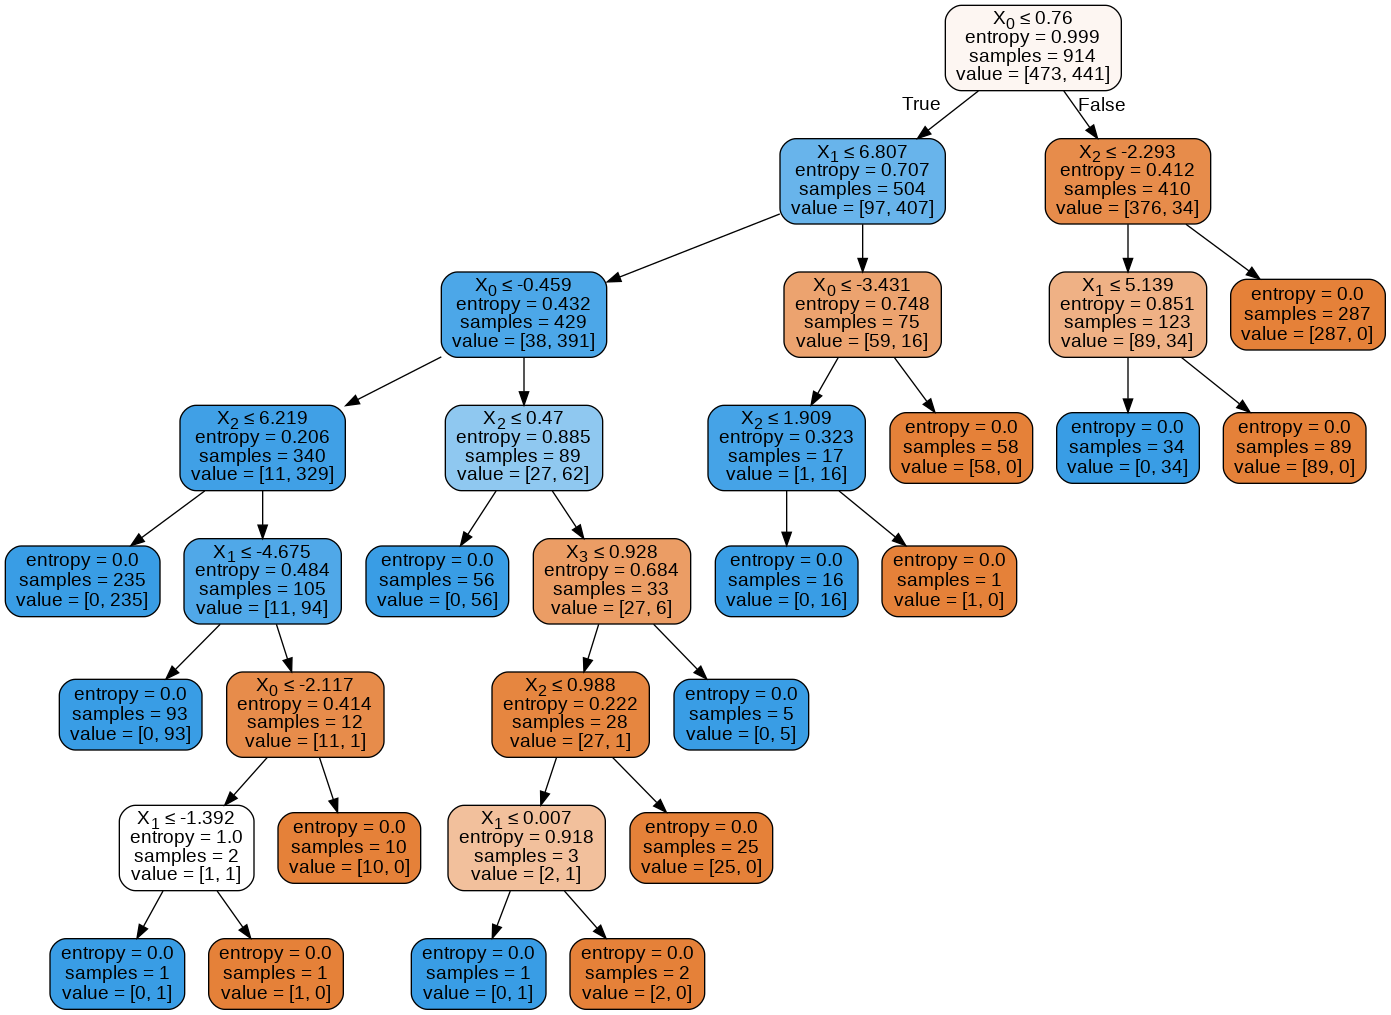

In [35]:
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())